<font size=8 face='Comic Sans MS' color="#FFBF00"><left><b>"CHENNAI HOUSE PRICE"</font>

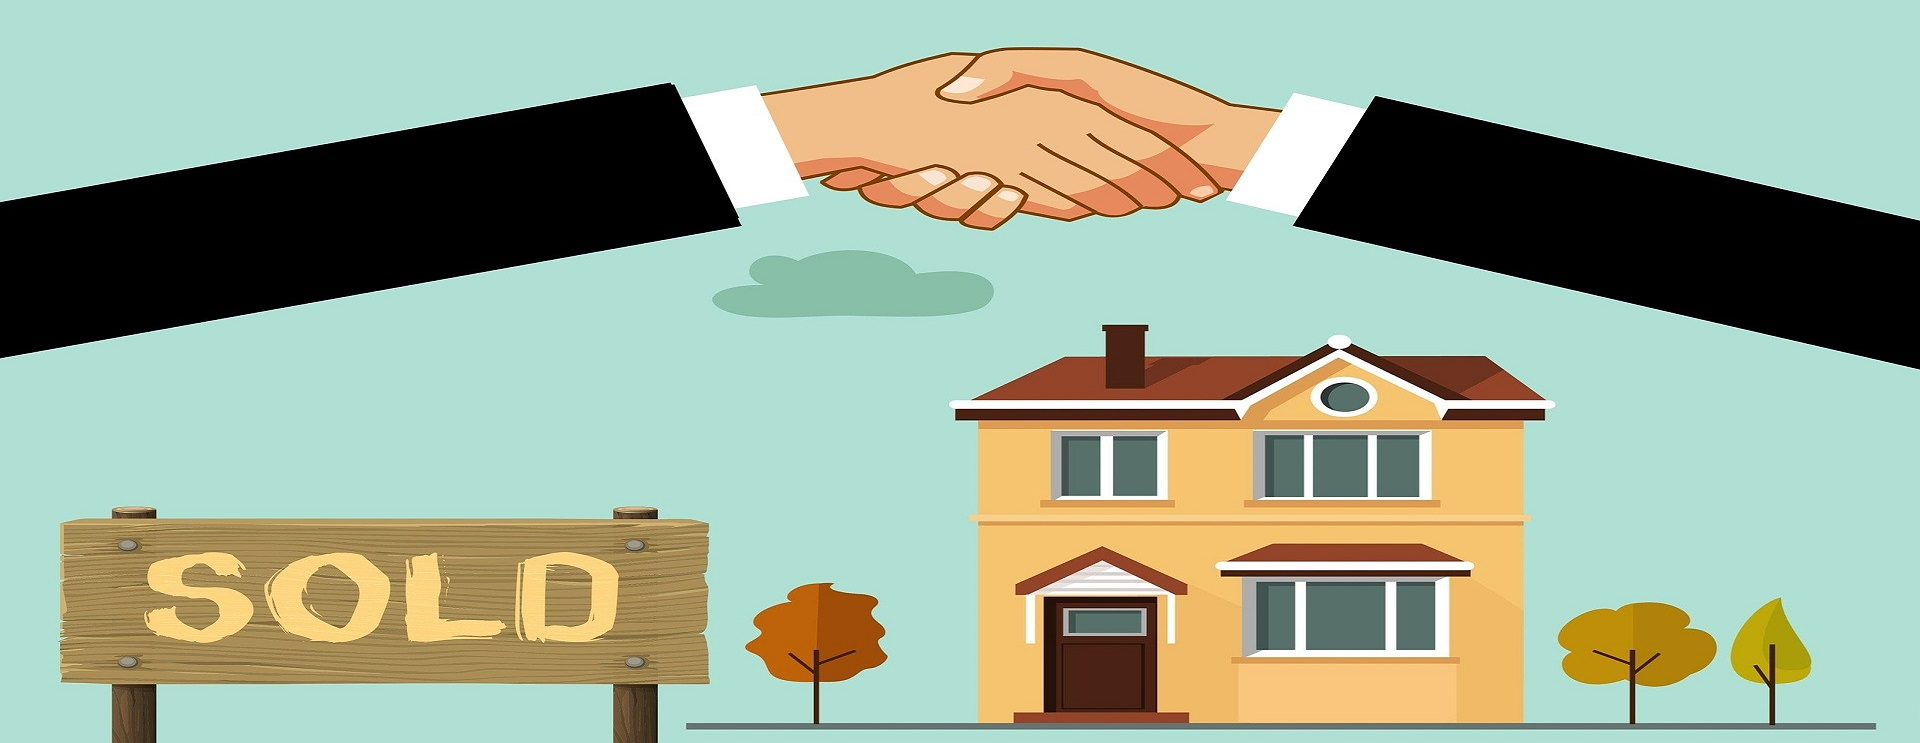

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>INTRODUCTION</font>

<font size=3 face='Comic Sans MS' color="#F28C28"><left><b>PROBLEM</font>

1. Real estate transactions are quite opaque sometimes and it 
    may be difficult for a newbie to know the fair price of any given home.  
    
<font size=3 face='Comic Sans MS' color="#F28C28"><left><b>PROPOSAL</font>

1. To make transactions transparent for both buyer and seller.
2. To help in transacting at a fair price.
3. To find factors that fetches higher price for sellers thereby
    helping them in construction planning.

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>Importing Packages</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings

In [3]:
warnings.filterwarnings('ignore')

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>GETTING DATA</font>

In [4]:
df = pd.read_csv("G:\Others\Data Science - TYPE A\Guvi\Project\\train-chennai-sale.csv")

In [5]:
df.head(3)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  

[3 rows x 22 columns]

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>DATA CLEANING & WRANGLING</font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
# Dropping feature
df = df.drop(columns='PRT_ID')

#### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>HANDLING NULL</font>

### 1.

In [8]:
df[df['N_BEDROOM'].isnull()]

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
4060  Anna Nagar      1556  16-01-2013            181        NaN         1.0   

      N_ROOM SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL     STREET  \
4060       4  Partiall         No  23-01-1986  ...       NoSewr   No Access   

     MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
4060     RM      4.8          2.7         2.0       3.155   313136  107978   

      SALES_PRICE  
4060     10797790  

[1 rows x 21 columns]

In [9]:
# Checking the avg number of Bedrooms for similar specs 
avg = df[(df['INT_SQFT']>1500) & (df['INT_SQFT']<1600)& 
         (df['AREA']=='Anna Nagar')]['N_BEDROOM'].mean()
avg

1.0

In [10]:
df['N_BEDROOM'].fillna(round(avg),inplace=True)

### 2.

In [11]:
df[df['N_BATHROOM'].isnull()]

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
70    Anna Nagar      1589  22-03-2010             39        1.0         NaN   
5087    Chrompet      1016  02-08-2012            105        1.0         NaN   
6134    Chormpet       916  02-08-2012            173        1.0         NaN   
6371    Chrompet      1035  06-11-2012             90        1.0         NaN   
6535  Anna Nagar      1864  05-03-2007            184        2.0         NaN   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  \
70         4      Partial         No  02-04-1966  ...        AllPub   
5087       3     AbNormal        Yes  10-08-1980  ...       NoSewr    
6134       3  Normal Sale        Yes  12-08-1974  ...           ELO   
6371       3      Partial         No  14-11-1981  ...        NoSeWa   
6535       5       Family        Yes  07-03-1997  ...       NoSewr    

         STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
70       Gravel     RL      2.1          2.5         4.5        3.16   451857   
5087     Gravel     RM      3.2          4.2         2.0        3.24   330086   
6134      Paved     RL      3.4          3.5         3.0         NaN   265423   
6371  No Access     RM      2.3          3.5         3.2        3.05   223403   
6535      Paved     RM      3.3          3.7         4.7        3.96   575606   

      COMMIS  SALES_PRICE  
70     85486     12212350  
5087  106479     10647920  
6134   44237      8847420  
6371   24823      8274200  
6535  124455     15556920  

[5 rows x 21 columns]

In [12]:
# Checking the avg number of Bathroom for similar specs
avg_bth = round(df[(df['INT_SQFT']>1500) & (df['INT_SQFT']<1600)
                   & (df['AREA']=='Anna Nagar')]['N_BATHROOM'].mean())

df['N_BATHROOM'].fillna(avg_bth,inplace=True)
# Chrompet was also found to have same numbers.

### 3.

In [13]:
# Filling NaN with the the respective mean of each row
df['QS_OVERALL'].fillna(((df['QS_ROOMS']+df['QS_BATHROOM']
                          +df['QS_BEDROOM'])/3).round(3),inplace=True)

In [14]:
# Checking for null
anynul = dict(df.isnull().sum())

for key,value in anynul.items():
    if value>0:
        print(key)
    else:
        continue
print("No more null")

No more null


#### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>HANDLING TIME SERIES</font>

In [15]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

#Taking only years for age
age = []
sub = df['DATE_SALE']-df['DATE_BUILD']
for i in range(0,df.shape[0]):
    age.append(round((sub[i].days)/365))
    
df['Age'] = age 

In [16]:
df.drop(columns=['DATE_SALE','DATE_BUILD'],inplace=True)

#### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>HANDLING DUPLICATES</font>

In [17]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [18]:
df.loc[df['AREA']=='Ann Nagar','AREA'] = 'Anna Nagar'
df.loc[df['AREA']=='Ana Nagar','AREA'] = 'Anna Nagar'
df.loc[df['AREA']=='Karapakam','AREA'] = 'Karapakkam'
df.loc[df['AREA']=='Adyr','AREA'] = 'Adyar'
df.loc[df['AREA']=='Velchery','AREA'] = 'Velachery'
df.loc[df['AREA']=='Chormpet','AREA'] = 'Chrompet'
df.loc[df['AREA']=='Chrompt','AREA'] = 'Chrompet'
df.loc[df['AREA']=='Chrmpet','AREA'] = 'Chrompet'
df.loc[df['AREA']=='KKNagar','AREA'] = 'KK Nagar'
df.loc[df['AREA']=='TNagar','AREA'] = 'T Nagar'

In [19]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [20]:
df.loc[df['SALE_COND']=='Ab Normal','SALE_COND']='AbNormal'
df.loc[df['SALE_COND']=='Partiall','SALE_COND']='Partial'
df.loc[df['SALE_COND']=='PartiaLl','SALE_COND']='Partial'
df.loc[df['SALE_COND']=='Adj Land','SALE_COND']='AdjLand'

In [21]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [22]:
df.loc[df['PARK_FACIL']=='Noo','PARK_FACIL']='No'

In [23]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [24]:
df.loc[df['BUILDTYPE']=='Other','BUILDTYPE']='Others'
df.loc[df['BUILDTYPE']=='Comercial','BUILDTYPE']='Commercial'

In [25]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [26]:
df.loc[df['UTILITY_AVAIL']=='All Pub','UTILITY_AVAIL']='AllPub'
df.loc[df['UTILITY_AVAIL']=='NoSewr ','UTILITY_AVAIL']='NoSewr'

In [27]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [28]:
df.loc[df['STREET']=='Pavd','STREET']='Paved'
df.loc[df['STREET']=='NoAccess','STREET']='No Access'

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>EXPLORATORY DATA ANALYSIS (EDA)</font>

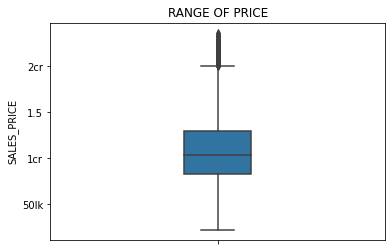

In [29]:
# To look at spread of price and spot any outliers
sns.boxplot(data=df, y=df['SALES_PRICE'],width=0.2)
plt.yticks([5000000,10000000,15000000,20000000],['50lk','1cr','1.5','2cr'])
plt.title('RANGE OF PRICE')
plt.show()

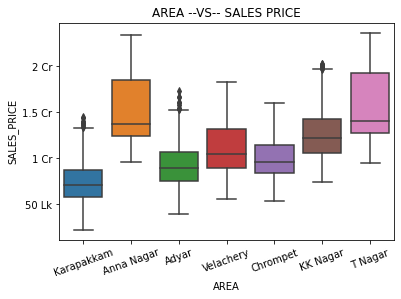

In [30]:
ax = sns.boxplot(data=df, x=df['AREA'], y=df['SALES_PRICE'])
plt.xticks(rotation=20)
plt.yticks([5000000,10000000,15000000,20000000],['50 Lk','1 Cr','1.5 Cr','2 Cr'])
plt.title('AREA --VS-- SALES PRICE')
plt.show()

# Looks like range of prices are high on T Nagar and Anna nagar

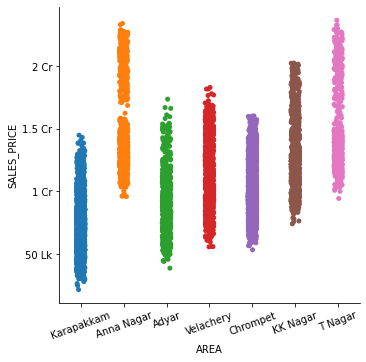

In [31]:
sns.catplot(data=df, x="AREA", y="SALES_PRICE")
plt.yticks([5000000,10000000,15000000,20000000],['50 Lk','1 Cr','1.5 Cr','2 Cr'])
plt.xticks(rotation=20)
plt.show()

In [32]:
fig = px.scatter(x=df['INT_SQFT'],y=df['SALES_PRICE'],color=df['AREA'],
                 labels={'x':'Area in Sqft','y':'SALES_PRICE'},title='LOCALITY-WISE, SALES_PRICE(INR) --vs-- AREA(sqft)')
fig.show()

'''1.This further proves that the property is expensive in Anna nagar 
   and T Nagar.
   
   2.The larger properties (>2000 Sqft) size are available only in KK nagar.
   
   3.Chromepete,Adyar and Karapakkam appears to be cheaper than others but 
   could be because of smaller land area.
   '''

'1.This further proves that the property is expensive in Anna nagar \n   and T Nagar.\n   \n   2.The larger properties (>2000 Sqft) size are available only in KK nagar.\n   \n   3.Chromepete,Adyar and Karapakkam appears to be cheaper than others but \n   could be because of smaller land area.\n   '

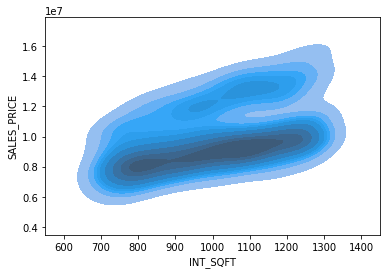

In [33]:
cat1 = df[df['AREA']=='Chrompet']
sns.kdeplot(cat1['INT_SQFT'],cat1['SALES_PRICE'],shade=True)
plt.show()

# Most common sales price for Chromepet is between 80Lk to 1Cr 

In [34]:
# Creating a feature "Price per Sqft"
df['Pri/sqft'] = df['SALES_PRICE']/df['INT_SQFT']

In [35]:
fig=px.histogram(x=df['AREA'],y=df['Pri/sqft'],color=df['N_BEDROOM'],
           labels={'x':'Locality','y':'price per sqft'},
           title='LOCALITY --vs-- PRICE PER SQFT BY NUMBER OF BEDROOMS')
fig.show()

'''As the number of rooms are increasing the "Total Sum" of Price per Sqft
   is increasing.
   This could be misleading as it the Total Sum and not Individual Property.
   '''

'As the number of rooms are increasing the "Total Sum" of Price per Sqft\n   is increasing.\n   This could be misleading as it the Total Sum and not Individual Property.\n   '

In [36]:
# Summary of the features based on Locality
# To check if there is any obvious outlying factors

areawise = df.groupby(df['AREA'],as_index=False).mean()
areawise

AREA     INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
0       Adyar   958.166667     101.332041   1.170543    1.170543  2.895349   
1  Anna Nagar  1752.998731     100.661168   1.398477    1.000000  4.398477   
2    Chrompet  1003.254994      98.133373   1.165100    1.000000  3.002938   
3    KK Nagar  1903.332999     100.700100   2.811434    1.595787  4.811434   
4  Karapakkam  1103.406296     101.028551   1.308931    1.308931  2.992679   
5     T Nagar  1759.576846     103.516966   1.449102    1.000000  4.449102   
6   Velachery  1741.293578      94.840979   2.374108    1.374108  4.374108   

   QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL        REG_FEE  \
0  3.500000     3.510594    3.496124    3.500032  322263.179587   
1  3.540609     3.477157    3.465863    3.495211  494162.835025   
2  3.499941     3.522268    3.464689    3.498071  291393.096357   
3  3.548044     3.529589    3.512738    3.528428  509300.316951   
4  3.496047     3.487994    3.493777    3.492748  294066.408492   
5  3.552894     3.510379    3.530539    3.532495  510572.688623   
6  3.523751     3.505199    3.465341    3.500534  386959.715596   

          COMMIS   SALES_PRICE        Age      Pri/sqft  
0   72649.600775  9.185668e+06  22.695090   9783.934955  
1  181868.359137  1.516820e+07  25.393401   8666.545412  
2  102795.611046  1.001381e+07  22.133373  10116.880041  
3  213803.278837  1.269623e+07  17.382146   6767.160072  
4  121310.526354  7.340100e+06  27.759883   6994.312104  
5  195333.756487  1.561674e+07  25.227545   8897.103910  
6  154102.203874  1.104735e+07  30.310907   6354.402746

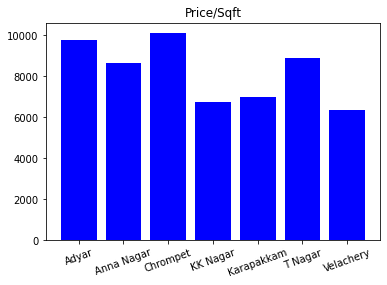

'1.It is clear that chrompet is the most expensive locality \n   2.Also adyar seems to be 2nd most expensive in comparision.\n   3.Followed by T nagar and Anna nagar.\n'

In [37]:
plt.bar(areawise['AREA'],areawise['Pri/sqft'],color='Blue')
plt.xticks(rotation=20)
plt.title('Price/Sqft')
plt.show()

'''1.It is clear that chrompet is the most expensive locality 
   2.Also adyar seems to be 2nd most expensive in comparision.
   3.Followed by T nagar and Anna nagar.
'''

<BarContainer object of 7109 artists>

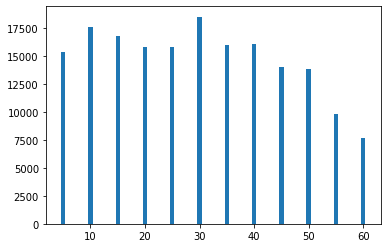

In [38]:
Age_bin = pd.cut(df['Age'], 
                 [0,5,10,15,20,25,30,35,40,45,50,55,60],
                 labels=[5,10,15,20,25,30,35,40,45,50,55,60])

plt.bar(Age_bin,df['Pri/sqft'])

# Building aged above 40 have an impact on Price per square feet (it decreases)

In [39]:
pd.crosstab(df.AREA,df.N_BEDROOM,margins=
            True).style.background_gradient(cmap='summer_r')

'''1.More number of bedrooms does not seem to increase the price.
   2.Houses in adyar,anna nagar, chromepete, karapakkam, T nagar, 
     have less bedrooms when compared to KK nagar and velachery.
   3.Chromepete, Adayar, Anna nagar and T-Nagar properties are 
     selling for high price.
   4.Karapakkam is not selling for higher price,But why?
   5.Also from previous plots:Anna nagar and T nagar houses have 
     large carpet area when compared to karapakkam and chromepet.
     '''

In [40]:
pd.crosstab(df['AREA'],df['N_BATHROOM'],
            margins=True).style.background_gradient(cmap='summer_r')

'''1.Anna nagar and T nagar are also having only one bathroom even when
     carpet area is large,Hence having more spacious houses.
   2.Velachery houses are having larger land but are building more 
     bedrooms and bathrooms.
'''

In [41]:
pd.crosstab([df['AREA'],df['N_ROOM']],df['N_BEDROOM'],
            margins=True).style.background_gradient(cmap='summer_r')

In [42]:
pd.crosstab([df['AREA'],df['N_ROOM']],df['N_BATHROOM'],
            margins=True).style.background_gradient(cmap='summer_r')

'''1.Velachery building are having only bedrooms and bathrooms but no hall or kitchen.
   2.Buildings in Karapakkam,Adyar,Velachery,Chrompet and KK Nagar appear to  have 
   only bedroom, bathroom and either kitchen or hall or sometimes none(No Hall and Kitchen).   
   3.Buildings in Anna Nagar & T Nagar always have bedroom, hall, kitchen and bathroom.
'''

In [43]:
# Adding a new feature Number of Hall and Kitchen
df['Hall_Kitc'] = df['N_ROOM']-df['N_BEDROOM']-df['N_BATHROOM']

In [44]:
fig2 = px.scatter(x=df['REG_FEE'],y=df['SALES_PRICE'],color=df['AREA'],labels={'x':'REG_FEE','y':'SALES_PRICE'})
fig2.show()

# Sale_Price has linear relationship with Reg_Fess

In [45]:
df['RegFee%'] = round((df['REG_FEE']/df['SALES_PRICE'])*100,2)
df['COMMIS%'] = round((df['COMMIS']/df['SALES_PRICE'])*100,2)

<function matplotlib.pyplot.show(close=None, block=None)>

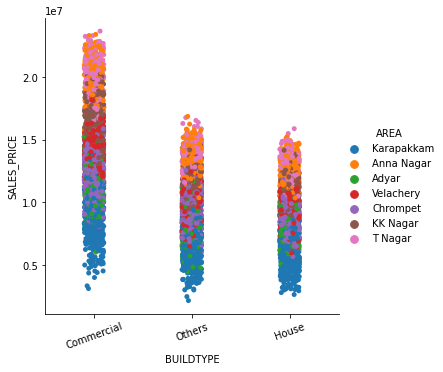

In [46]:
sns.catplot(data=df, hue="AREA", y="SALES_PRICE",x='BUILDTYPE')
plt.xticks(rotation=20)
plt.show

# Commercial buildings are costlier than house.

'1.MZZone has an impact on price. \n   2.It is clear that buildings in RM,RH and RL zone have higher price. \n'

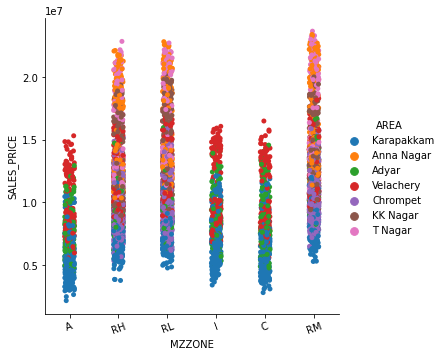

In [47]:
sns.catplot(data=df, hue="AREA", y="SALES_PRICE",x='MZZONE')
plt.xticks(rotation=20)
plt.show

'''1.MZZone has an impact on price. 
   2.It is clear that buildings in RM,RH and RL zone have higher price. 
'''

In [48]:
pd.crosstab(df['AREA'],df['MZZONE'],
            margins=True).style.background_gradient(cmap='summer_r')

'''1.Areas that come under RM,RH and RL zones only, are: Anna Nagar,
     TNagar, Chrompet and  KK Nagar.This could also be the reason 
     for higher sales price.
'''

In [49]:
df.groupby(df['AREA'],as_index=False)['RegFee%'].mean()

AREA   RegFee%
0       Adyar  3.509044
1  Anna Nagar  3.252919
2    Chrompet  2.907579
3    KK Nagar  4.010933
4  Karapakkam  4.013909
5     T Nagar  3.257485
6   Velachery  3.503874

'''1.Percentage of registration fee is less in anna nagar, T nagar 
     and chromepete.This could also be the reason for higher
     sales price.
'''

In [50]:
px.scatter(x=df['SALES_PRICE'],y=df['COMMIS'],color=df['AREA'])

# Commision appears to have some relation with Sales Price

In [51]:
df.groupby(df['AREA'],as_index=False)['COMMIS%'].mean().style.background_gradient(cmap='YlOrBr_r')

'''1.People in T nagar and Anna nagar are paying optimum commision 
    percentage,close to mean of commision payed by all area.
'''

In [52]:
df_adyar = df[df['AREA']=='Adyar']
df_Karapakkam = df[df['AREA']=='Karapakkam']
df_AnnaNagar = df[df['AREA']=='Anna Nagar']
df_Velachery = df[df['AREA']=='Velachery']
df_Chrompet = df[df['AREA']=='Chrompet']
df_KKNagar = df[df['AREA']=='KK Nagar']
df_TNagar = df[df['AREA']=='T Nagar']

In [53]:
fig = make_subplots(rows=2,cols=4, start_cell='top-left',
                   subplot_titles=(['Adyar','Anna Nagar','Chromepete','KK Nagar',
                                   'Karapakkam','T Nagar','Velachery','Hypothesis']))

fig.add_trace(go.Scatter(x=df_adyar['INT_SQFT'],y=df_adyar['Pri/sqft'],mode='markers',
                         marker=dict(color=df_adyar['N_BEDROOM'],coloraxis="coloraxis")),
                         row=1,col=1)
              
fig.add_trace(go.Scatter(x=df_AnnaNagar['INT_SQFT'],y=df_AnnaNagar['Pri/sqft'],mode='markers',
                         marker=dict(color=df_AnnaNagar['N_BEDROOM'],coloraxis="coloraxis")),
                         row=1,col=2)              

fig.add_trace(go.Scatter(x=df_Chrompet['INT_SQFT'],y=df_Chrompet['Pri/sqft'],
                         mode='markers',marker=dict(color=df_Chrompet['N_BEDROOM'],coloraxis="coloraxis")),
                         row=1,col=3)

fig.add_trace(go.Scatter(x=df_KKNagar['INT_SQFT'],y=df_KKNagar['Pri/sqft'],
                         mode='markers',marker=dict(color=df_KKNagar['N_BEDROOM'],coloraxis="coloraxis")),
                         row=1,col=4)

fig.add_trace(go.Scatter(x=df_Karapakkam['INT_SQFT'],y=df_Karapakkam['Pri/sqft'],
                         mode='markers',marker=dict(color=df_Karapakkam['N_BEDROOM'],coloraxis="coloraxis")),
                         row=2,col=1)

fig.add_trace(go.Scatter(x=df_TNagar['INT_SQFT'],y=df_TNagar['Pri/sqft'],
                         mode='markers',marker=dict(color=df_TNagar['N_BEDROOM'],coloraxis="coloraxis")),
                         row=2,col=2)

fig.add_trace(go.Scatter(x=df_Velachery['INT_SQFT'],y=df_Velachery['Pri/sqft'],
                         mode='markers',marker=dict(color=df_Velachery['N_BEDROOM'],coloraxis="coloraxis")),
                         row=2,col=3)

fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[5,4.5,3.8,2.5,2]),row=2,col=4)

fig.update_yaxes(title_text="'Pri/sqft'", row=1, col=1)                   
fig.update_xaxes(title_text="INT_SQFT", row=1, col=4)                         
fig.update_xaxes(title_text="INT_SQFT", row=2, col=1)
fig.update_yaxes(title_text="'Pri/sqft'", row=2, col=1)
fig.update_xaxes(title_text="INT_SQFT", row=2, col=2)                   
fig.update_xaxes(title_text="INT_SQFT", row=2, col=3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

# As the land area becomea larger and larger people are paying less for each Sqft

#### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>HANDLING CATEGORICAL DATA (Encoding Based on price/sqft)</font>

### 1.

In [54]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [55]:
df.groupby(df['AREA'])['Pri/sqft'].mean().sort_values()

AREA
Velachery      6354.402746
KK Nagar       6767.160072
Karapakkam     6994.312104
Anna Nagar     8666.545412
T Nagar        8897.103910
Adyar          9783.934955
Chrompet      10116.880041
Name: Pri/sqft, dtype: float64

In [56]:
mapping = {'Karapakkam':2, 'Anna Nagar':3, 'Adyar':5,
           'Velachery':0, 'Chrompet':6,'KK Nagar':1, 
           'T Nagar':4}
df['AREA_ENCO'] = df['AREA'].map(mapping)
df['AREA_ENCO'] = df['AREA_ENCO'].astype('object')

In [57]:
df.loc[0:5,['AREA','AREA_ENCO']]

AREA AREA_ENCO
0  Karapakkam         2
1  Anna Nagar         3
2       Adyar         5
3   Velachery         0
4  Karapakkam         2
5    Chrompet         6

### 2.

In [58]:
df.groupby(df['SALE_COND'])['Pri/sqft'].mean().sort_values()

SALE_COND
Partial        8008.079788
Family         8169.198355
AbNormal       8242.661593
Normal Sale    8264.477155
AdjLand        8537.477568
Name: Pri/sqft, dtype: float64

In [59]:
mapping = {'Partial':0, 'Family':1, 'AbNormal':2,
           'Normal Sale':3, 'AdjLand':4}

df['SALE_COND_ENCO'] = df['SALE_COND'].map(mapping).astype('object')

### 3.

In [60]:
mapping = {'No':0, 'Yes':1}

df['PARK_FACIL_ENCO'] = df['PARK_FACIL'].map(mapping).astype('object')

### 4.

In [61]:
mapping = {'House':0,'Others':1,'Commercial':2}

df['BUILDTYPE_ENCO'] = df['BUILDTYPE'].map(mapping).astype('object')

### 5.

In [62]:
mapping = {'NoSeWa':0,'NoSewr':1,'ELO':2,'AllPub':3}

df['UTILITY_AVAIL_ENCO'] = df['UTILITY_AVAIL'].map(mapping).astype('object')

### 6.

In [63]:
df.groupby(df['STREET'])['Pri/sqft'].mean().sort_values()

STREET
No Access    7982.054013
Paved        8164.666776
Gravel       8537.227958
Name: Pri/sqft, dtype: float64

In [64]:
mapping = {'No Access':0,'Paved':1,'Gravel':2}

df['STREET_ENCO'] = df['STREET'].map(mapping).astype('object')

### 7.

In [65]:
df.groupby(df['MZZONE'])['Pri/sqft'].mean().sort_values()

MZZONE
A     6164.595585
C     6786.170216
I     7400.093278
RH    8214.393785
RL    8625.518175
RM    9186.830866
Name: Pri/sqft, dtype: float64

In [66]:
mapping = {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}

df['MZZONE_ENCO'] = df['MZZONE'].map(mapping).astype('object')

In [67]:
# Dropping unwanted cateorical columns
df_Enco = df.drop(columns=['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL',
                          'STREET','MZZONE'])

In [68]:
df_Enco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INT_SQFT            7109 non-null   int64  
 1   DIST_MAINROAD       7109 non-null   int64  
 2   N_BEDROOM           7109 non-null   float64
 3   N_BATHROOM          7109 non-null   float64
 4   N_ROOM              7109 non-null   int64  
 5   QS_ROOMS            7109 non-null   float64
 6   QS_BATHROOM         7109 non-null   float64
 7   QS_BEDROOM          7109 non-null   float64
 8   QS_OVERALL          7109 non-null   float64
 9   REG_FEE             7109 non-null   int64  
 10  COMMIS              7109 non-null   int64  
 11  SALES_PRICE         7109 non-null   int64  
 12  Age                 7109 non-null   int64  
 13  Pri/sqft            7109 non-null   float64
 14  Hall_Kitc           7109 non-null   float64
 15  RegFee%             7109 non-null   float64
 16  COMMIS

#### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>Checking for Correlation</font>

<AxesSubplot:>

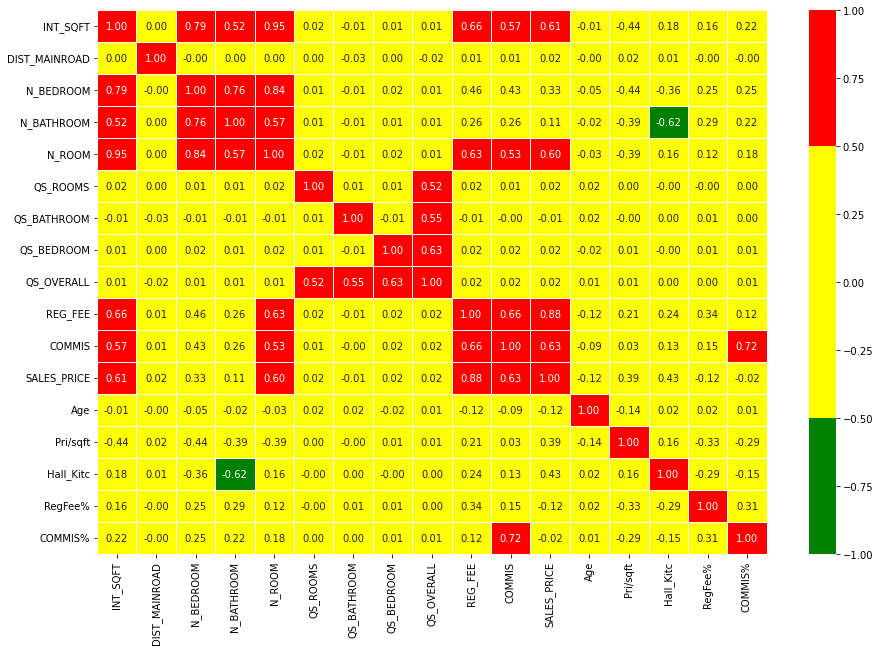

In [69]:
corr_matrix=df_Enco.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.7,
           fmt=".2f",vmin=-1,vmax=1,
           cmap=['green','yellow','yellow','red'])

In [70]:
# Dropping similar columns and also those with high corelation
df_Enco = df_Enco.drop(columns=['DIST_MAINROAD','N_BATHROOM','N_ROOM','QS_ROOMS','QS_BATHROOM',
                               'QS_BEDROOM','QS_OVERALL','Age','RegFee%','COMMIS%'])

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>ML MODELING</font>

In [71]:
df_Enco.columns

Index(['INT_SQFT', 'N_BEDROOM', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Pri/sqft',
       'Hall_Kitc', 'AREA_ENCO', 'SALE_COND_ENCO', 'PARK_FACIL_ENCO',
       'BUILDTYPE_ENCO', 'UTILITY_AVAIL_ENCO', 'STREET_ENCO', 'MZZONE_ENCO'],
      dtype='object')

In [72]:
# Preparing Input and Target Variables
X = df_Enco.drop(columns = ['SALES_PRICE','Pri/sqft'])
Y = df_Enco['SALES_PRICE']

In [73]:
# Splitting the train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)

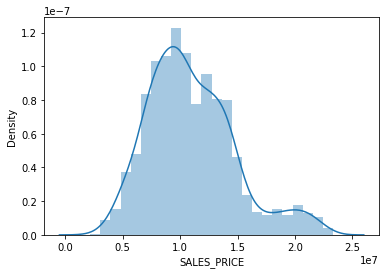

In [74]:
# Checking if target is normally distributed
sns.distplot(y_test)
plt.show()

In [75]:
# Normalization
scaler = MinMaxScaler()

cols_tr = x_train.columns
cols_ts = x_test.columns

for i in cols_tr[0:4]:
    x_train[i] = scaler.fit_transform(x_train[i].values.reshape(-1,1))

for i in cols_ts[0:4]:
    x_test[i] = scaler.transform(x_test[i].values.reshape(-1,1))

In [76]:
# Fit model
model1 = LinearRegression()
model1.fit(x_train,y_train)

# Predict results
y_pred = model1.predict(x_test)

# Model Score
print(model1.score(x_test,y_test))
print(r2_score(y_test,y_pred))

0.7654514650142936
0.7654514650142936


In [77]:
# Least to Most important features
feat = X.columns
coe = list(model1.coef_)
feat_coe = {}
for i in range(0,len(feat)):
    feat_coe[feat[i]]= coe[i]
    
feat_coe_sort = sorted(feat_coe.items(), key=lambda x: (x[1]))
feat_coe_sort

[('UTILITY_AVAIL_ENCO', 75403.90793409942),
 ('SALE_COND_ENCO', 101786.20639800964),
 ('N_BEDROOM', 159965.73174650944),
 ('STREET_ENCO', 292156.00139248697),
 ('MZZONE_ENCO', 353530.8422681021),
 ('AREA_ENCO', 423653.9298485848),
 ('PARK_FACIL_ENCO', 591128.492450769),
 ('Hall_Kitc', 945590.5343488685),
 ('COMMIS', 1128342.6215509088),
 ('BUILDTYPE_ENCO', 1410701.0676401085),
 ('INT_SQFT', 6625496.145245456),
 ('REG_FEE', 9059255.463761125)]

### <font size=3 face='Comic Sans MS' color="#F28C28"><left><I>FEATURE ENGINEERING & RE-MODELING</font>

In [78]:
# Picking most important features that compliment each other. 
X = df_Enco.drop(columns = ['SALES_PRICE','Pri/sqft','UTILITY_AVAIL_ENCO','N_BEDROOM',
                           'SALE_COND_ENCO','STREET_ENCO','PARK_FACIL_ENCO','STREET_ENCO',
                           'MZZONE_ENCO','BUILDTYPE_ENCO','INT_SQFT',
                           'COMMIS'])
Y = df_Enco['SALES_PRICE']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)

In [80]:
# Normalization
scaler = MinMaxScaler()

cols_tr = x_train.columns
cols_ts = x_test.columns

for i in cols_tr[0:1]:
    x_train[i] = scaler.fit_transform(x_train[i].values.reshape(-1,1))

for i in cols_ts[0:1]:
    x_test[i] = scaler.transform(x_test[i].values.reshape(-1,1))

In [81]:
# Fit model
model1 = LinearRegression()
model1.fit(x_train,y_train)

# Predict results
y_pred = model1.predict(x_test)

# Model Score
print(model1.score(x_test,y_test))
print(r2_score(y_test,y_pred))

0.8459878450314201
0.8459878450314201


In [88]:
# Cross Validating to confirm accuracy
from sklearn.model_selection import KFold,cross_val_score
spl = KFold(n_splits = 10)
# model  = LinearRegression()
result = cross_val_score(model1,X,Y,cv = spl,scoring = None)
print(f"This model's accuracy is {round(result.mean()*100,2)}%")

This model's accuracy is 83.76%
